Load the houseprices data from Thinkful's database.
Reimplement your model from the previous checkpoint.
Try OLS, Lasso, Ridge, and ElasticNet regression using the same model specification. This time, you need to do k-fold cross-validation to choose the best hyperparameter values for your models. Scikit-learn has RidgeCV, LassoCV, and ElasticNetCV that you can utilize to do this. Which model is the best? Why?

In [75]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pylab
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sqlalchemy import create_engine
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sqlalchemy import create_engine
import seaborn as sns

In [76]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df1 = pd.read_sql_query('select* from houseprices', con = engine)

engine.dispose()

Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.
Is the performance of your model satisfactory? Why?


In [77]:
X = pd.concat([df1[['overallcond', 'grlivarea', 'garagecars']], pd.get_dummies(df1['mszoning'], prefix = 'mszoning', drop_first = True)], axis = 1)
y = df1['saleprice']


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)



R-squared of the model on the training set is: 0.6504306299519151
-----Test set statistics-----
R-squared of the model on the test set is: 0.6393878428344044
Mean absolute error of the prediction is: 30376.843162222256
Mean squared error of the prediction is: 1940299357.5574079
Root mean squared error of the prediction is: 44048.82924162012
Mean absolute percentage error of the prediction is: 18.375596243886353


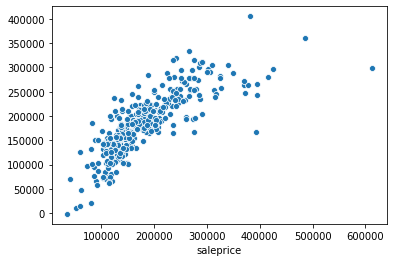

In [95]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(X_train, y_train)
y_lrmpredict = lrm.predict(X_test)
sns.scatterplot(y_test, y_lrmpredict)

print("R-squared of the model on the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_lrmpredict)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_lrmpredict)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_lrmpredict)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_lrmpredict) / y_test)) * 100))


0.629447859267569
1
R-squared of the model on the training set is: 0.6500712140017095
-----Test set statistics-----
R-squared of the model on the test set is: 0.637832964623517
Mean absolute error of the prediction is: 30316.837235265346
Mean squared error of the prediction is: 1948665490.3505392
Root mean squared error of the prediction is: 44143.69139923098
Mean absolute percentage error of the prediction is: 18.284910078259


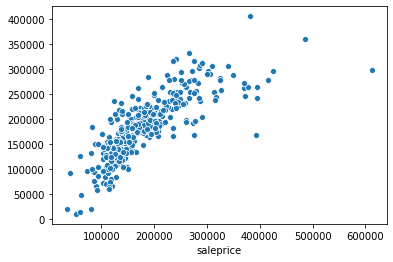

In [84]:
from sklearn.linear_model import Ridge
RG = Ridge()
pms = [{'alpha':[1,10,100,1000,10000]}]

from sklearn.model_selection import GridSearchCV
RGcv = GridSearchCV(RG, param_grid=pms)

RGcv.fit(X_train, y_train)
print(RGcv.best_score_)
print(RGcv.best_estimator_.alpha)
y_test_predRG = RGcv.predict(X_test)



from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

RGbest = Ridge(alpha =1)
RGbest.fit(X_train, y_train)

y_test_predRG = RGbest.predict(X_test)

sns.scatterplot(y_test, y_test_predRG)


print("R-squared of the model on the training set is: {}".format(RGcv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(RGcv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_test_predRG)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_test_predRG)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_test_predRG)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_test_predRG) / y_test)) * 100))


0.6297412895863383
100
R-squared of the model on the training set is: 0.649645576546656
-----Test set statistics-----
R-squared of the model on the test set is: 0.6373859963834589
Mean absolute error of the prediction is: 30273.431415807194
Mean squared error of the prediction is: 1951070434.7535503
Root mean squared error of the prediction is: 44170.92295564527
Mean absolute percentage error of the prediction is: 18.243359984503808


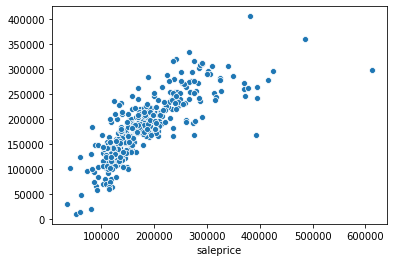

In [85]:
from sklearn.linear_model import Lasso

LS = Lasso()
pms = [{'alpha':[1,10,100,1000,10000]}]

from sklearn.model_selection import GridSearchCV
LScv = GridSearchCV(LS, param_grid=pms)

LScv.fit(X_train, y_train)
print(LScv.best_score_)
print(LScv.best_estimator_.alpha)

LSbest = Lasso(alpha =100)
LSbest.fit(X_train, y_train)

y_test_LSbest = LSbest.predict(X_test)

sns.scatterplot(y_test, y_test_LSbest)

print("R-squared of the model on the training set is: {}".format(LSbest.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(LSbest.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_test_LSbest)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_test_LSbest)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_test_LSbest)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_test_LSbest) / y_test)) * 100))


0.5829134939273585
1
R-squared of the model on the training set is: 0.604573569831647
-----Test set statistics-----
R-squared of the model on the test set is: 0.5913976336875817
Mean absolute error of the prediction is: 31051.0463998392
Mean squared error of the prediction is: 2198514090.827941
Root mean squared error of the prediction is: 46888.315077724226
Mean absolute percentage error of the prediction is: 18.345419631145752


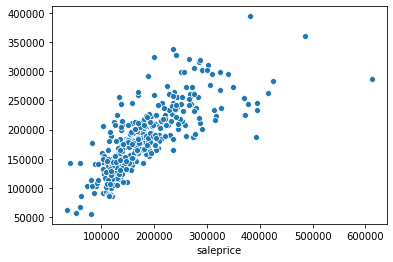

In [88]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(l1_ratio=0.5) 


ELcv = GridSearchCV(elasticregr, param_grid=pms)
ELcv.fit(X_train, y_train)

print(ELcv.best_score_)
print(ELcv.best_estimator_.alpha)

# We are making predictions here
ELbest = ElasticNet(alpha =1,l1_ratio=0.5)
ELbest.fit(X_train, y_train)

y_test_ELbest = ELbest.predict(X_test)

sns.scatterplot(y_test, y_test_ELbest)

print("R-squared of the model on the training set is: {}".format(ELbest.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ELbest.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_test_ELbest)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_test_ELbest)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_test_ELbest)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_test_ELbest) / y_test)) * 100))


The best model is Ridge regression with an lambda of 1. This produces the least error between train and test set and has a reasonable r squared value.

In [90]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]
ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 1.0
R-squared of the model in training set is: 0.6500712140017095
-----Test set statistics-----
R-squared of the model in test set is: 0.637832964623517
Mean absolute error of the prediction is: 30316.837235265346
Mean squared error of the prediction is: 1948665490.3505392
Root mean squared error of the prediction is: 44143.69139923098
Mean absolute percentage error of the prediction is: 18.284910078259
